In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Algebra 3

### Two Perspectives on `Matrix @ vector`

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
= ????
$

In [2]:
X = np.array([[4, 5], [6, 7], [8, 9]])
c = np.array([2, 3]).reshape(-1, 1)
X @ c

array([[23],
       [33],
       [43]])

### Row Picture

Do matrix multiplication one row at a time.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
(4*2)+(5*3)\\
(6*2)+(7*3)\\
(8*2)+(9*3)\\
\end{bmatrix}
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

In [3]:
def matrix_multi_by_row(X, c):
    """
    function that performs same action as @ operator
    """
    ???
    
matrix_multi_by_row(X, c)

array([[23],
       [33],
       [43]])

In [4]:
X.shape

(3, 2)

### Column Picture

$\begin{bmatrix}
c_0&c_1&c_2\\
\end{bmatrix}
\cdot
\begin{bmatrix}
x\\y\\z\\
\end{bmatrix}
=(c_0*x) + (c_1*y) + (c_2*z)
$

matrix multiplication takes a **linear combination** of columns.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
4\\6\\8\\
\end{bmatrix}*2
+
\begin{bmatrix}
5\\7\\9\\
\end{bmatrix}*3
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

In [5]:
def matrix_multi_by_col(X, c):
    """
    same result as matrix_multi_by_row above, 
    but different approach
    """
    ???
    
matrix_multi_by_col(X, c)

array([[23.],
       [33.],
       [43.]])

In [6]:
X.shape

(3, 2)

In [7]:
# Create a vertical vector / array containing 3 0's
np.???

array([[0.],
       [0.],
       [0.]])

### Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [8]:
A = np.array([
    [1, 100],
    [2, 10],
    [3, 0]
])
B = np.array([
    [1, 0],
    [0, 2],
    [0, 3],
    [0, 0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [9]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ ???

array([[101],
       [ 12],
       [  3]])

In [10]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([-1, 0]).reshape(-1, 1)

array([[-1],
       [-2],
       [-3]])

In [11]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0, 2]).reshape(-1, 1)

array([[200],
       [ 20],
       [  0]])

In [12]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0, 0]).reshape(-1, 1)

array([[0],
       [0],
       [0]])

A right-sized zero vector will always be in the column space.

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [13]:
c = np.array([-1, 1]).reshape(-1, 1) # coef
B @ c

array([[-1],
       [ 2],
       [ 3],
       [ 0]])

### Solution
- in the column space of B: 
    - a [2, 1]
    - c [-10, 0]
    - e [-1, 1]
- not in the column space: 
    - b (no weighting of 0 and 0 can make a 1)
    - d (if you multiple 2 and 3 by the same constant, the sign will be the same)

### Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

#### Fruit Sales Example

##### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

##### Equations

* `10*apple + basket = 7`
* `2*apple + 8*banana + basket = 5`
* `4*apple + 4*banana + basket = 5`

In [14]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
])
y = np.array([7, 5, 5]).reshape(-1, 1)

c = np.linalg.solve(X, y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

In [15]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    # adding one more equation
    ???
])
y = np.array([7, 5, 5, ???]).reshape(-1, 1) # mathematically unsolvable

c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

In [16]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 4,  4,  1]])

In [17]:
np.array([[ 4,  4,  1]]) @ c

array([[5.]])

In [18]:
np.array([[???]]) @ c

array([[5.75]])

#### There is a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it.

- mathematically solvable

In [19]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    # adding one more equation
    [5, 5, 1],
])
y = np.array([7, 5, 5, 5.75]).reshape(-1, 1)

c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

### Equivalent statements

* there is a solution for the system of equations and `np.linalg.solve` can find it
* there is a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

### Problem with most tables

For a system of equations, same # of equations == # of variables usually means it's solvable.  

However, often cases, dataset has more rows than columns, which means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [20]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 5,  5,  1]])

In [21]:
y

array([[7.  ],
       [5.  ],
       [5.  ],
       [5.75]])

matrix multiplication both sides by `X.T` ---> this will usually make it solvable.

In [22]:
c = ???
c

array([[0.5 ],
       [0.25],
       [2.  ]])

What is special about matrix multiplication of a matrix with its transpose? Resultant shape is always a square.

Why? Say X has the shape of (a, b), then X.T has the shape of (b, a). Then X.T @ X has the shape of (b, b).

In [23]:
???

(3, 3)

### Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = ????$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector $c$ by $P$, you get back another vector $c'$ of the same size, with two properties:

1. $c'$ will be in the column space of $X$
2. the new vector $c'$ will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

### Fruit Sales Example

In [24]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    [10, 4, 1],
    [10, 4, 1]
])
y = np.array([7, 5, 5, 8, 8.5]).reshape(-1, 1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

Let's compute $P = X(X^TX)^{-1}X^T$.

- **IMPORTANT**: We are not going to discuss how inverse works. That is beyond the scope of CS320.

### `np.linalg.inv(a)`

- computes the (multiplicative) inverse of a matrix.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

In [25]:
P = ???
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [26]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [27]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

The new vector will be as "close as possible" to the original vector.

In [28]:
???

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

#### Scatter plot visualization

**IMPORTANT**: We are not going to discuss how `np.random.normal` works. You can look up the documentation if you are interested.

In [29]:
x = np.random.normal(5, 2, size=(10, 1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x": x.reshape(-1), "y": y.reshape(-1)})
df

,x,y
0,3.829531,7.359774
1,4.124254,7.213342
2,6.889804,13.761519
3,6.305543,14.193228
4,2.876830,5.576872
5,7.377743,14.308413
6,3.300590,4.643487
7,4.500651,6.915917
8,3.560770,7.357303
9,4.074755,9.587717


<AxesSubplot:xlabel='x', ylabel='y'>

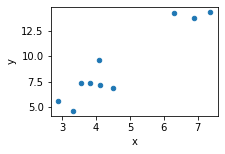

In [30]:
df.plot.scatter(???, figsize=(3, 2))

In [31]:
X = ???
X

array([[3.82953116],
       [4.12425358],
       [6.88980417],
       [6.3055428 ],
       [2.87682978],
       [7.37774293],
       [3.30058966],
       [4.500651  ],
       [3.5607696 ],
       [4.0747554 ]])

In [32]:
P = ???
P

array([[0.0605895 , 0.06525249, 0.10900806, 0.09976408, 0.04551619,
        0.11672806, 0.05222077, 0.07120772, 0.05633724, 0.06446935],
       [0.06525249, 0.07027435, 0.11739737, 0.10744197, 0.04901914,
        0.1257115 , 0.0562397 , 0.0766879 , 0.06067298, 0.06943094],
       [0.10900806, 0.11739737, 0.19611909, 0.17948803, 0.0818893 ,
        0.21000833, 0.09395168, 0.12811157, 0.10135773, 0.1159884 ],
       [0.09976408, 0.10744197, 0.17948803, 0.16426729, 0.07494502,
        0.19219944, 0.08598449, 0.11724759, 0.09276251, 0.10615248],
       [0.04551619, 0.04901914, 0.0818893 , 0.07494502, 0.03419278,
        0.08768874, 0.03922941, 0.05349284, 0.0423218 , 0.04843082],
       [0.11672806, 0.1257115 , 0.21000833, 0.19219944, 0.08768874,
        0.22488121, 0.10060537, 0.13718448, 0.10853593, 0.12420274],
       [0.05222077, 0.0562397 , 0.09395168, 0.08598449, 0.03922941,
        0.10060537, 0.04500795, 0.06137238, 0.04855585, 0.05556473],
       [0.07120772, 0.0766879 , 0.1281115

In [33]:
df???
df

,x,y,p
0,3.829531,7.359774,7.524293
1,4.124254,7.213342,8.103366
2,6.889804,13.761519,13.537141
3,6.305543,14.193228,12.389180
4,2.876830,5.576872,5.652418
5,7.377743,14.308413,14.495847
6,3.300590,4.643487,6.485024
7,4.500651,6.915917,8.842914
8,3.560770,7.357303,6.996228
9,4.074755,9.587717,8.006111


<AxesSubplot:xlabel='x', ylabel='p'>

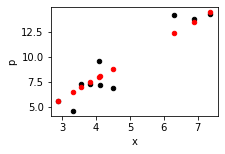

In [34]:
ax = df.plot.scatter(???, figsize=(3, 2), color="k")
df.plot.scatter(???, color="r", ax=ax)

### Euclidean Distance between columns

- how close is the new vector (`P @ y`) to the original vector (`y`)?
- $dist$ = $\sqrt{(x2 - x1)^2 + (y2 - y1)^2}$

In [35]:
coords = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
coords

,v1,v2
x,1,4
y,8,12


In [36]:
# distance between v1 and v2 is 5
???

5.0

In [37]:
# this is the smallest possible distance between y and p, such
# that X @ c = p is solveable
???

3.7284597597651445